# Part 1: Simulating the robot

In [1]:
import numpy as np
import random as rand
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
from scipy.stats import norm
import seaborn as sns
import pandas as pd

def func(U,x):
    #-2x+2U
    val = -(2*x) + 2*U
    return val
def simulation(x,t,h):
    save = 0
    U_save = []
    t_save = []
    x_save = []
    x_exact_save = []

    U_array = []
    t_array = []
    x_array = []
    x_exact_array = []
    while(t <= 15):
        if(t <= 5):
            U = 2
        elif(t < 5 or t <= 10):
            U = 1
        elif(t < 10 or t <=15):
            U = 3
        #print("U value:", x)
        U_array.append(U)
        k = h * func(U,x)
        x = x + k
        t = t + h
        #value under graph
        x_exact = U - math.exp(-2*t)
        t_array.append(t)
        x_array.append(x)
        x_exact_array.append(x_exact)
        save+=1
        #save every 10th integral if h<=0.01
        if(save%10 == 0):
            U_save.append(U)
            t_save.append(t)
            x_save.append(x)
            x_exact_save.append(x_exact)
            #print("save1: ",save)
        #print("Where it is: ",x,"Exact pos= ",x_exact,"Time: ",t)
    return U_save,t_save,x_save,x_exact_save,U_array,t_array,x_array,x_exact_array 

The following step sizes were provided to measure against: 0.75, .5, 0.25, 0.01, 0.001


## Step size 0.001

In [2]:
U_save1 = []
t_save1 = []
x_save1 = []
x_exact_save1 = []


##saves every time
U_array1 = []
t_array1 = []
x_array1 = []
x_exact_array1 = []

#step size 
U_save1,t_save1,x_save1,x_exact_save1,U_array1,t_array1,x_array1,x_exact_array1=simulation(0,0,0.001)

#0.35 for bell curve

## Step size 0.01

In [3]:
U_save2 = []
t_save2 = []
x_save2 = []
x_exact_save2 = []


##saves every time
U_array2 = []
t_array2 = []
x_array2 = []
x_exact_array2 = []

#step size 
U_save2,t_save2,x_save2,x_exact_save2,U_array2,t_array2,x_array2,x_exact_array2=simulation(0,0,0.01)

#0.35 for bell curve

## Step size 0.25

In [4]:
U_save3 = []
t_save3 = []
x_save3 = []
x_exact_save3 = []


##saves every time
U_array3 = []
t_array3 = []
x_array3 = []
x_exact_array3 = []

#step size 
U_save3,t_save3,x_save3,x_exact_save3,U_array3,t_array3,x_array3,x_exact_array3=simulation(0,0,0.25)

## Step size 0.5

In [5]:
U_save4 = []
t_save4 = []
x_save4 = []
x_exact_save4 = []


##saves every time
U_array4 = []
t_array4 = []
x_array4 = []
x_exact_array4 = []

#step size 
U_save4,t_save4,x_save4,x_exact_save4,U_array4,t_array4,x_array4,x_exact_array4=simulation(0,0,0.5)

## Step size 0.75

In [6]:
U_save5 = []
t_save5 = []
x_save5 = []
x_exact_save5 = []


##saves every time
U_array5 = []
t_array5 = []
x_array5 = []
x_exact_array5 = []

#step size 
U_save5,t_save5,x_save5,x_exact_save5,U_array5,t_array5,x_array5,x_exact_array5=simulation(0,0,0.75)

## Saving values into a dataframe and plotting it 

In [7]:
data1 = {'X':x_array1,'T':t_array1}
df1 = pd.DataFrame(data1)
data2 = {'X':x_array2,'T':t_array2}
df2= pd.DataFrame(data2)
data3 = {'X':x_array3,'T':t_array3}
df3= pd.DataFrame(data3)
data4= {'X':x_array4,'T':t_array4}
df4= pd.DataFrame(data4)
data5= {'X':x_array5,'T':t_array5}
df5= pd.DataFrame(data5)

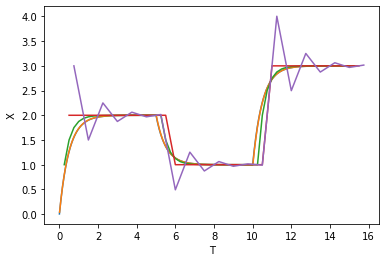

In [8]:
plt3 = sns.lineplot(x="T", y="X", data=df1) #blue
plt4 = sns.lineplot(x="T", y="X", data=df2) #Orange
plt5 = sns.lineplot(x="T", y="X", data=df3) #Green
plt6 = sns.lineplot(x="T", y="X", data=df4) #Red
plt7 = sns.lineplot(x="T", y="X", data=df5) #Purple

# Part 2: Random Noise using Box Muller Method

## Initialise/Compute standard deviation and mean

In [9]:
import statistics as stat
std_dev1 = stat.stdev(x_array1)
_mean1 = stat.mean(x_array1)

std_dev = 0.0431
_mean = 0.5
print("deviation: ",std_dev,"mean: ",_mean,"DEVIATION: ",std_dev1,"MEAN: ",_mean1)

deviation:  0.0431 mean:  0.5 DEVIATION:  0.7789244866974134 MEAN:  1.900142980914039


## compute box muller algorithm

In [10]:
random_vals = []
i = 0
it = 0
while i < len(x_array1):
 if(it==0):
    z1 = rand.uniform(0,2*np.pi) #values from 0 to (2*np.pi) our a#
    b = std_dev*np.sqrt(-2*math.log(rand.uniform(0,1)))
    z2 = b *(math.sin(z1))+_mean
    z3 = b*(math.cos(z1))+_mean
    noise = x_array1[i] + z2
    random_vals.append(noise)
    print("nose1: ",noise,x_array1[i])
    it = 1
    i = i + 1
 else:
    it = 0
    noise = x_array1[i] + z3
    random_vals.append(noise)  
    print("nose2: ",noise,x_array1[i])
    i = i + 1
    #print("nose2: ",noise,x_array[i])
        
#meu is mean sigma is std deviation

nose1:  0.43165380176549495 0.004
nose2:  0.49086445855215033 0.007991999999999999
nose1:  0.5201031321266159 0.011976015999999999
nose2:  0.4626284167976761 0.015952063968
nose1:  0.4670573243122989 0.019920159840063997
nose2:  0.5468218810039939 0.02388031952038387
nose1:  0.5474950263760744 0.027832558881343103
nose2:  0.52873315884893 0.031776893763580415
nose1:  0.5046326726598876 0.035713339976053256
nose2:  0.5882932193308478 0.03964191329610115
nose1:  0.5286530294312041 0.04356262946950895
nose2:  0.6041949116253478 0.04747550421056993
nose1:  0.513284549315189 0.05138055320214879
nose2:  0.6264907228760876 0.055277792095744495
nose1:  0.5573516174995274 0.059167236511553006
nose2:  0.5587772863172082 0.0630489020385299
nose1:  0.5373186648803103 0.06692280423445285
nose2:  0.5796452083162236 0.07078895862598394
nose1:  0.5854498737302533 0.07464738070873198
nose2:  0.6209245652760965 0.07849808594731451
nose1:  0.5389619428114956 0.08234108977541989
nose2:  0.4510408412679036

nose2:  1.9112935930967416 1.4468568963606927
nose1:  1.9731810661795286 1.4479631825679713
nose2:  1.858065491294083 1.4490672562028353
nose1:  1.9487066907239674 1.4501691216904296
nose2:  1.9212209349072076 1.4512687834470488
nose1:  1.9321268091108643 1.4523662458801547
nose2:  1.983727331467708 1.4534615133883944
nose1:  1.9528105949219725 1.4545545903616175
nose2:  1.9928376381203803 1.4556454811808943
nose1:  1.8881014501453277 1.4567341902185325
nose2:  2.001112283447399 1.4578207218380954
nose1:  1.9042449785077122 1.4589050803944192
nose2:  1.944907390362936 1.4599872702336305
nose1:  1.8819414575279612 1.4610672956931632
nose2:  1.9051538651550617 1.4621451611017768
nose1:  1.9519868972740801 1.4632208707795733
nose2:  1.9096360717485847 1.4642944290380142
nose1:  2.0260304593151983 1.465365840179938
nose2:  2.0117152142641856 1.4664351084995781
nose1:  1.9172930610151824 1.467502238282579
nose2:  1.9943605416590735 1.4685672338060138
nose1:  1.980586761354004 1.469630099338

nose1:  2.3423861669870822 1.8544847395934465
nose2:  2.3764303836829583 1.8547757701142595
nose1:  2.321137519864363 1.855066218574031
nose2:  2.3587771475290427 1.855356086136883
nose1:  2.34103316148499 1.8556453739646093
nose2:  2.4179403257442598 1.85593408321668
nose1:  2.3412988710897578 1.8562222150502465
nose2:  2.4540220939184234 1.856509770620146
nose1:  2.3669612592969496 1.8567967510789058
nose2:  2.407531323474446 1.8570831575767481
nose1:  2.3314395206512355 1.8573689912615947
nose2:  2.407602828772296 1.8576542532790716
nose1:  2.3384464640403158 1.8579389447725134
nose2:  2.2902640415125166 1.8582230668829685
nose1:  2.3256893912790275 1.8585066207492025
nose2:  2.369400582561279 1.8587896075077042
nose1:  2.333533014627903 1.8590720282926887
nose2:  2.3731743939349483 1.8593538842361033
nose1:  2.3983560582168453 1.859635176467631
nose2:  2.4046604103127946 1.859915906114696
nose1:  2.382326732365095 1.8601960743024666
nose2:  2.350993479417254 1.8604756821538617
nose

nose1:  2.4606504578057513 1.9616426108865561
nose2:  2.4096129133875377 1.961719325664783
nose1:  2.482948180303196 1.9617958870134533
nose2:  2.4296964650238797 1.9618722952394263
nose1:  2.4047774359981804 1.9619485506489474
nose2:  2.4595159213588316 1.9620246535476495
nose1:  2.469597580146865 1.9621006042405542
nose2:  2.436607093511678 1.9621764030320732
nose1:  2.419817432801211 1.962252050226009
nose2:  2.5352043001447213 1.962327546125557
nose1:  2.3662458803085857 1.9624028910333058
nose2:  2.4714142150564786 1.9624780852512391
nose1:  2.4853053306028543 1.9625531290807365
nose2:  2.4545872509050226 1.962628022822575
nose1:  2.425152486555317 1.96270276677693
nose2:  2.414547394158835 1.962777361243376
nose1:  2.4867214233376953 1.9628518065208893
nose2:  2.444284295106621 1.9629261029078475
nose1:  2.5082321692086604 1.9630002507020319
nose2:  2.4657208152492864 1.9630742502006278
nose1:  2.4891317136588462 1.9631481017002266
nose2:  2.479276703658341 1.9632218054968262
nos

nose2:  2.492659233101154 1.9899093282938272
nose1:  2.491727142378926 1.9899295096372396
nose2:  2.4690382390330607 1.989949650617965
nose1:  2.481793043307929 1.9899697513167292
nose2:  2.569474661904067 1.9899898118140957
nose1:  2.5408677760886142 1.9900098321904676
nose2:  2.4752380254357345 1.9900298125260867
nose1:  2.414213003630451 1.9900497529010346
nose2:  2.525690664325476 1.9900696533952325
nose1:  2.473400619829548 1.990089514088442
nose2:  2.4275844300008176 1.9901093350602652
nose1:  2.5074220186850047 1.9901291163901447
nose2:  2.481357650227712 1.9901488581573643
nose1:  2.4672725561426025 1.9901685604410495
nose2:  2.467408213446857 1.9901882233201673
nose1:  2.504955575655627 1.990207846873527
nose2:  2.455044620932879 1.9902274311797798
nose1:  2.5370501904635425 1.9902469763174202
nose2:  2.4970529105197343 1.9902664823647853
nose1:  2.4122470649312495 1.9902859494000558
nose2:  2.494069569144842 1.9903053775012556
nose1:  2.511491547415135 1.9903247667462531
nose

nose2:  2.5196894015389817 1.9979902762977364
nose1:  2.511805843435001 1.9979942957451409
nose2:  2.506522906837956 1.9979983071536507
nose1:  2.475878793151117 1.9980023105393434
nose2:  2.553408081680092 1.9980063059182647
nose1:  2.5095223296332385 1.998010293306428
nose2:  2.495590904389934 1.9980142727198151
nose1:  2.5219323101144777 1.9980182441743755
nose2:  2.5092255719315246 1.9980222076860268
nose1:  2.5241306592791024 1.9980261632706546
nose2:  2.4852614154155264 1.9980301109441134
nose1:  2.527062841329607 1.9980340507222252
nose2:  2.501417367485018 1.9980379826207808
nose1:  2.4560289750540263 1.9980419066555393
nose2:  2.463357317312248 1.9980458228422282
nose1:  2.469313954326696 1.9980497311965437
nose2:  2.506515972779598 1.9980536317341506
nose1:  2.5592126052655977 1.9980575244706824
nose2:  2.4953309775818666 1.998061409421741
nose1:  2.536844389677024 1.9980652866028976
nose2:  2.545393985916635 1.998069156029692
nose1:  2.5495426740629807 1.9980730177176325
nos

nose1:  2.5741303153640427 1.9994981181771798
nose2:  2.5385421820053047 1.9994991219408254
nose1:  2.4863733379725663 1.9995001236969436
nose2:  2.543552260170107 1.9995011234495497
nose1:  2.5299147626135623 1.9995021212026505
nose2:  2.4725177215097767 1.999503116960245
nose1:  2.494567555349128 1.9995041107263245
nose2:  2.5491260749979214 1.9995051025048718
nose1:  2.5269710927291067 1.999506092299862
nose2:  2.5113249375248237 1.9995070801152623
nose1:  2.4823724408530454 1.9995080659550317
nose2:  2.5228576825001836 1.9995090498231216
nose1:  2.575588056835263 1.9995100317234753
nose2:  2.4592490039991666 1.9995110116600283
nose1:  2.4935762933670653 1.9995119896367082
nose2:  2.488590414375688 1.9995129656574349
nose1:  2.4705943665766523 1.99951393972612
nose2:  2.4836162583823223 1.9995149118466677
nose1:  2.5748908140114297 1.9995158820229744
nose2:  2.481035785894039 1.9995168502589284
nose1:  2.4868452571669515 1.9995178165584107
nose2:  2.523983726030962 1.999518780925294

nose1:  2.4479729185674355 1.9998583868574746
nose2:  2.43724014205359 1.9998586700837597
nose1:  2.491425085116316 1.9998589527435922
nose2:  2.4991713437563856 1.999859234838105
nose1:  2.490571129785353 1.9998595163684287
nose2:  2.4764543632725844 1.999859797335692
nose1:  2.4472957783179754 1.9998600777410205
nose2:  2.4980013599907798 1.9998603575855385
nose1:  2.543469406159148 1.9998606368703673
nose2:  2.5206956386116977 1.9998609155966265
nose1:  2.5422007728647595 1.9998611937654331
nose2:  2.4548266558632146 1.9998614713779024
nose1:  2.5363363385253392 1.9998617484351466
nose2:  2.502296165256721 1.9998620249382764
nose1:  2.5920432581980317 1.9998623008883998
nose2:  2.523788191136414 1.999862576286623
nose1:  2.5316633201384633 1.9998628511340497
nose2:  2.365898664829308 1.9998631254317816
nose1:  2.4785615566807544 1.999863399180918
nose2:  2.5078758672883383 1.9998636723825562
nose1:  2.481858812400318 1.999863945037791
nose2:  2.549738323493519 1.9998642171477155
nos

nose1:  2.080844558580462 1.6196697912889981
nose2:  2.0892748184088026 1.61843045170642
nose1:  2.091469634980289 1.6171935908030073
nose2:  2.104239477943566 1.6159592036214012
nose1:  2.0339912648012426 1.6147272852141583
nose2:  2.10155928055973 1.61349783064373
nose1:  2.103671054046202 1.6122708349824426
nose2:  2.0570446692007085 1.6110462933124776
nose1:  2.1281146845371737 1.6098242007258527
nose2:  2.2274060889479244 1.608604552324401
nose1:  2.1659161231964763 1.6073873432197523
nose2:  2.0137905640076204 1.6061725685333128
nose1:  2.0626230818102673 1.604960223396246
nose2:  2.0414663386133065 1.6037503029494535
nose1:  2.0417271833250163 1.6025428023435546
nose2:  2.0150546517769956 1.6013377167388676
nose1:  2.075545376112038 1.6001350413053899
nose2:  2.124794005609502 1.598934771222779
nose1:  2.111513711707323 1.5977369016803336
nose2:  2.1323129592432877 1.596541427876973
nose1:  2.0849204832177946 1.595348345021219
nose2:  2.1193757799030455 1.5941576483311766
nose1:

nose2:  1.5801389209835466 1.1451452267853799
nose1:  1.6204278907940297 1.1448549363318092
nose2:  1.681390548114242 1.1445652264591457
nose1:  1.665946831186898 1.1442760960062275
nose2:  1.6826041739326092 1.143987543814215
nose1:  1.7249406092597137 1.1436995687265867
nose2:  1.6435108046410498 1.1434121695891335
nose1:  1.6691959193376387 1.1431253452499552
nose2:  1.6716244566025769 1.1428390945594553
nose1:  1.588585320272721 1.1425534163703364
nose2:  1.6851515057903161 1.1422683095375956
nose1:  1.6974227837649767 1.1419837729185205
nose2:  1.7030691731004701 1.1416998053726835
nose1:  1.6830042059959567 1.141416405761938
nose2:  1.650629229785999 1.1411335729504142
nose1:  1.6325896567455471 1.1408513058045133
nose2:  1.635318573210517 1.1405696031929042
nose1:  1.6899259776414608 1.1402884639865185
nose2:  1.6923798624093251 1.1400078870585455
nose1:  1.630145246013957 1.1397278712844283
nose2:  1.6289566102923692 1.1394484155418594
nose1:  1.6304527423350004 1.1391695187107

nose1:  1.540117303496566 1.044280624958049
nose2:  1.5528180517665129 1.0441920637081328
nose1:  1.5303848418529133 1.0441036795807166
nose2:  1.4996693061675095 1.044015472221555
nose1:  1.4693422770693003 1.043927441277112
nose2:  1.5067029326584687 1.0438395863945578
nose1:  1.54660866882165 1.0437519072217687
nose2:  1.582400055368396 1.0436644034073252
nose1:  1.5779439640738908 1.0435770746005106
nose2:  1.6024820122802774 1.0434899204513095
nose1:  1.5023431562928755 1.0434029406104068
nose2:  1.5420601115880206 1.043316134729186
nose1:  1.5422409979335743 1.0432295024597276
nose2:  1.5167829479912887 1.0431430434548081
nose1:  1.586334581281435 1.0430567573678986
nose2:  1.538450198140542 1.0429706438531627
nose1:  1.5262853887439316 1.0428847025654564
nose2:  1.5677066360649572 1.0427989331603256
nose1:  1.6287469160645434 1.042713335294005
nose2:  1.5721621364368672 1.042627908623417
nose1:  1.550735678502471 1.04254265280617
nose2:  1.502466258054236 1.0424575675005578
nose

nose1:  1.5412985673272468 1.0123452270862825
nose2:  1.4229710316911532 1.01232053663211
nose1:  1.441261763755321 1.0122958955588457
nose2:  1.4613497778228364 1.012271303767728
nose1:  1.5057813076618811 1.0122467611601926
nose2:  1.481500154259205 1.0122222676378723
nose1:  1.5042995123858292 1.0121978231025965
nose2:  1.4857647009367114 1.0121734274563914
nose1:  1.4750788917229052 1.0121490806014786
nose2:  1.4804659110712761 1.0121247824402757
nose1:  1.4598194773455955 1.0121005328753951
nose2:  1.5052454415724 1.0120763318096444
nose1:  1.5053502947697655 1.012052179146025
nose2:  1.500606441625684 1.012028074787733
nose1:  1.467468165994545 1.0120040186381576
nose2:  1.4536658301237722 1.0119800106008812
nose1:  1.5698406716673903 1.0119560505796794
nose2:  1.498692927188419 1.01193213847852
nose1:  1.4919253630030118 1.011908274201563
nose2:  1.5663619627469525 1.0118844576531598
nose1:  1.5059379880424233 1.0118606887378534
nose2:  1.5007523052196459 1.0118369673603778
nose

nose1:  1.4929778199650432 1.0036256873465599
nose2:  1.4589459874929085 1.0036184359718667
nose1:  1.4877473109410253 1.003611199099923
nose2:  1.4317720578719833 1.003603976701723
nose1:  1.5311196110946366 1.0035967687483196
nose2:  1.512262477541084 1.003589575210823
nose1:  1.4870742202277647 1.0035823960604013
nose2:  1.4825890924143668 1.0035752312682806
nose1:  1.5001194225998615 1.0035680808057441
nose2:  1.543123174953365 1.0035609446441327
nose1:  1.5198841846873674 1.0035538227548444
nose2:  1.480375591548163 1.0035467151093347
nose1:  1.5441333767358332 1.003539621679116
nose2:  1.5590390943280372 1.0035325424357577
nose1:  1.5156360998548304 1.0035254773508862
nose2:  1.391663022981974 1.0035184263961843
nose1:  1.5617984037859687 1.0035113895433918
nose2:  1.4344277285048654 1.003504366764305
nose1:  1.5053524936402494 1.0034973580307764
nose2:  1.5348785662687825 1.003490363314715
nose1:  1.4358307990533106 1.0034833825880856
nose2:  1.503128361914978 1.0034764158229095

nose2:  1.5465654783246594 1.0009538089418752
nose1:  1.504646178158115 1.0009519013239916
nose2:  1.4940062772473377 1.0009499975213436
nose1:  1.5391820871525108 1.000948097526301
nose2:  1.4330044629896972 1.0009462013312485
nose1:  1.4099735533747957 1.0009443089285859
nose2:  1.534521160769286 1.0009424203107287
nose1:  1.5054429925271564 1.0009405354701073
nose2:  1.494399455442759 1.0009386543991672
nose1:  1.5087035073455173 1.0009367770903688
nose2:  1.5328945740717843 1.000934903536188
nose1:  1.4898173612875578 1.0009330337291158
nose2:  1.5631828058723802 1.0009311676616575
nose1:  1.51686282252156 1.0009293053263342
nose2:  1.5114706090777421 1.0009274467156815
nose1:  1.4455696146526835 1.0009255918222502
nose2:  1.4618711575008767 1.0009237406386056
nose1:  1.4629597784360615 1.0009218931573283
nose2:  1.4760053555703168 1.0009200493710135
nose1:  1.4509929971665168 1.0009182092722715
nose2:  1.5409057042603023 1.000916372853727
nose1:  1.5275977974867756 1.0009145401080

nose2:  1.5151312437935438 1.000286936741455
nose1:  1.4394720960897835 1.0002863628679721
nose2:  1.5380247959328186 1.0002857901422362
nose1:  1.4930538292036126 1.0002852185619517
nose2:  1.5500543458849658 1.0002846481248278
nose1:  1.5087035284128898 1.000284078828578
nose2:  1.4911889246316452 1.000283510670921
nose1:  1.4340608647268773 1.000282943649579
nose2:  1.4631887328521018 1.0002823777622798
nose1:  1.4552358113695738 1.0002818130067552
nose2:  1.4273452260920525 1.0002812493807418
nose1:  1.5257372121698771 1.0002806868819802
nose2:  1.5683680138466594 1.0002801255082163
nose1:  1.5136765200058875 1.0002795652571999
nose2:  1.5528590649793932 1.0002790061266855
nose1:  1.4956257797543397 1.0002784481144322
nose2:  1.5038531292249888 1.0002778912182033
nose1:  1.5254164673611248 1.0002773354357668
nose2:  1.4796794837959781 1.0002767807648953
nose1:  1.4810131753632994 1.0002762272033656
nose2:  1.5522682978804188 1.000275674748959
nose1:  1.502269713890381 1.00027512339

nose2:  1.504422855005014 1.0000777855776806
nose1:  1.4829337552995652 1.0000776300065253
nose2:  1.539943093560506 1.0000774747465122
nose1:  1.4881951157866413 1.0000773197970192
nose2:  1.6163613638942331 1.0000771651574252
nose1:  1.554422897003213 1.0000770108271104
nose2:  1.4709001255552687 1.000076856805456
nose1:  1.4816268048939256 1.0000767030918452
nose2:  1.4287905986240779 1.0000765496856614
nose1:  1.5234998017588528 1.00007639658629
nose2:  1.4211690393743173 1.0000762437931174
nose1:  1.444001167106716 1.000076091305531
nose2:  1.5464135123477694 1.0000759391229201
nose1:  1.5000020675732086 1.0000757872446744
nose2:  1.424037084073694 1.000075635670185
nose1:  1.4740923101070145 1.0000754843988446
nose2:  1.4491378716891492 1.000075333430047
nose1:  1.4663878757982416 1.0000751827631869
nose2:  1.50729519302448 1.0000750323976604
nose1:  1.4987039078333284 1.0000748823328651
nose2:  1.4267205077444283 1.0000747325681993
nose1:  1.5650635577663796 1.0000745831030629
n

nose1:  2.629592068037727 2.094862401330308
nose2:  2.5703270940311818 2.0966726765276475
nose1:  2.6335725672756443 2.0984793311745924
nose2:  2.5878141840486255 2.1002823725122433
nose1:  2.612128323760458 2.102081807767219
nose2:  2.519575348635027 2.1038776441516847
nose1:  2.636186546989048 2.1056698888633814
nose2:  2.5879286530045804 2.1074585490856546
nose1:  2.559578906690214 2.1092436319874834
nose2:  2.582648814790842 2.1110251447235084
nose1:  2.627345293222627 2.1128030944340614
nose2:  2.6512518721723293 2.1145774882451933
nose1:  2.5742518502729963 2.1163483332687028
nose2:  2.65848652275196 2.118115636602165
nose1:  2.59106623757838 2.1198794053289607
nose2:  2.6079890622099207 2.121639646518303
nose1:  2.540189449681902 2.1233963672252663
nose2:  2.6395046309078474 2.1251495744908158
nose1:  2.6232413204261955 2.126899275341834
nose2:  2.6194502335001824 2.1286454767911502
nose1:  2.6555172442537907 2.130388185837568
nose2:  2.606503118186377 2.132127409465893
nose1:  

nose1:  3.2568398577196107 2.785856778184469
nose2:  3.2626358631440047 2.7862850646281
nose1:  3.330998572218716 2.7867124944988437
nose2:  3.2866610946449297 2.787139069509846
nose1:  3.284808058474619 2.7875647913708264
nose2:  3.303337526281758 2.787989661788085
nose1:  3.3004170689663064 2.7884136824645087
nose2:  3.252707382861727 2.78883685509958
nose1:  3.2837247306260005 2.789259181389381
nose2:  3.189776265993892 2.7896806630266022
nose1:  3.3324001846062967 2.790101301700549
nose2:  3.3285220972698903 2.790521099097148
nose1:  3.267840759384566 2.7909400568989535
nose2:  3.2928144941115036 2.7913581767851556
nose1:  3.307168753035538 2.791775460431585
nose2:  3.26294416263902 2.792191909510722
nose1:  3.261315455242078 2.7926075256917007
nose2:  3.2364631157911687 2.793022310640317
nose1:  3.3309436466067375 2.7934362660190364
nose2:  3.2138449274903245 2.7938493934869983
nose1:  3.295736790228425 2.7942616947000243
nose2:  3.3241451995223517 2.7946731713106243
nose1:  3.234

nose2:  3.452614288660871 2.937983194867588
nose1:  3.4570402454022995 2.9381072284778527
nose2:  3.4366981803251826 2.938231014020897
nose1:  3.3821605324175517 2.9383545519928553
nose2:  3.3448968278448055 2.9384778428888696
nose1:  3.5130320030912667 2.938600887203092
nose2:  3.390413804745065 2.938723685428686
nose1:  3.3862067521216184 2.9388462380578284
nose2:  3.4357408429748846 2.9389685455817127
nose1:  3.424210290213548 2.9390906084905493
nose2:  3.4119937528929274 2.939212427273568
nose1:  3.4535149972312245 2.939334002419021
nose2:  3.410177288135744 2.939455334414183
nose1:  3.482387143513248 2.939576423745355
nose2:  3.473900551326553 2.9396972708978644
nose1:  3.464717292532219 2.9398178763560687
nose2:  3.481115529030712 2.9399382406033565
nose1:  3.4540292243104735 2.94005836412215
nose2:  3.4200321170840606 2.9401782473939053
nose1:  3.4888982408167912 2.9402978908991173
nose2:  3.42134691048775 2.940417295117319
nose1:  3.431432034589658 2.9405364605270843
nose2:  3.

nose1:  3.501720256228811 2.981455044925524
nose2:  3.406614337425276 2.981492134835673
nose1:  3.497143793333864 2.9815291505660015
nose2:  3.548991895973495 2.9815660922648695
nose1:  3.511382023296192 2.9816029600803398
nose2:  3.426132250637027 2.981639754160179
nose1:  3.401538004681075 2.981676474651859
nose2:  3.4337424656831352 2.981713121702555
nose1:  3.468899975304117 2.98174969545915
nose2:  3.4888085352558686 2.981786196068232
nose1:  3.542298918423173 2.9818226236760954
nose2:  3.4153852741200574 2.9818589784287433
nose1:  3.429792822524694 2.9818952604718856
nose2:  3.5281216255193573 2.9819314699509416
nose1:  3.4885212297346824 2.9819676070110397
nose2:  3.498980101442851 2.9820036717970178
nose1:  3.498537805629199 2.9820396644534237
nose2:  3.4954116008998612 2.982075585124517
nose1:  3.524600160571034 2.982111433954268
nose2:  3.4853338608065285 2.9821472110863594
nose1:  3.485629442110744 2.9821829166641867
nose2:  3.4701204558466725 2.9822185508308583
nose1:  3.50

nose2:  3.5079718677927763 2.9950426167624262
nose1:  3.4818594742999114 2.995052531528901
nose2:  3.477770164489013 2.9950624264658434
nose1:  3.489763780245876 2.995072301612912
nose2:  3.552622036285756 2.995082157009686
nose1:  3.4978625688197003 2.995091992695667
nose2:  3.487088800073195 2.9951018087102756
nose1:  3.478261940279182 2.995111605092855
nose2:  3.5393243136213357 2.995121381882669
nose1:  3.560214761248532 2.9951311391189037
nose2:  3.5236540146882707 2.995140876840666
nose1:  3.550881816220926 2.995150595086985
nose2:  3.5270192699319978 2.9951602938968107
nose1:  3.535437426774404 2.995169973309017
nose2:  3.5265624098519166 2.9951796333623992
nose1:  3.469048467360376 2.9951892740956745
nose2:  3.4275355640360603 2.995198895547483
nose1:  3.565474296244926 2.995208497756388
nose2:  3.4738005727957235 2.9952180807608753
nose1:  3.568616484269307 2.9952276445993533
nose2:  3.567089572654477 2.9952371893101546
nose1:  3.5190781211556863 2.9952467149315343
nose2:  3.4

nose2:  3.4698834456418846 2.9987088513690785
nose1:  3.4718731384787977 2.9987114336663403
nose2:  3.4973337127951005 2.9987140107990076
nose1:  3.536434616554306 2.9987165827774094
nose2:  3.4475801663261727 2.9987191496118544
nose1:  3.471324204650793 2.9987217113126308
nose2:  3.565735630192105 2.9987242678900055
nose1:  3.5229124666518135 2.9987268193542254
nose2:  3.5360184978319 2.998729365715517
nose1:  3.5621112667642465 2.998731906984086
nose2:  3.5346424280963626 2.9987344431701177
nose1:  3.5309313441714103 2.9987369742837773
nose2:  3.5210792946010807 2.9987395003352098
nose1:  3.4731840028996017 2.9987420213345395
nose2:  3.4776948644933663 2.9987445372918704
nose1:  3.5393101732486603 2.998747048217287
nose2:  3.503541430819774 2.9987495541208524
nose1:  3.490411094852488 2.9987520550126106
nose2:  3.5133788495458895 2.9987545509025852
nose1:  3.435774551625724 2.99875704180078
nose2:  3.5395433836225294 2.9987595277171786
nose1:  3.5161252389860294 2.9987620086617444
no

nose2:  3.538425199250001 2.999626825605139
nose1:  3.5073166032438543 2.999627571953929
nose2:  3.5069374567132 2.9996283168100213
nose1:  3.5369764494475415 2.9996290601764013
nose2:  3.4758031594213845 2.9996298020560483
nose1:  3.525400225930132 2.999630542451936
nose2:  3.4267051175671135 2.9996312813670323
nose1:  3.5101456490656395 2.999632018804298
nose2:  3.4897570148503005 2.9996327547666897
nose1:  3.4677302097817058 2.9996334892571563
nose2:  3.4767727955595733 2.999634222278642
nose1:  3.5098305583862484 2.999634953834085
nose2:  3.4921201304402523 2.999635683926417
nose1:  3.4871392488944917 2.999636412558564
nose2:  3.442873406679883 2.999637139733447
nose1:  3.499405541891708 2.99963786545398
nose2:  3.5048107253522645 2.999638589723072
nose1:  3.3901607139397236 2.999639312543626
nose2:  3.5332258185799583 2.9996400339185385
nose1:  3.5237148998953005 2.9996407538507013
nose2:  3.4820285571073915 2.999641472343
nose1:  3.5172065777140897 2.9996421893983136
nose2:  3.44

## Noise plot

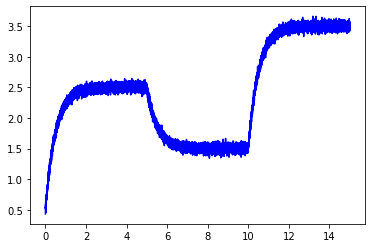

In [11]:
y = random_vals
x = t_array1
plt.plot(x,y,"b") #actual
plt.show()

## Proof that numbers generated fall within a gaussian distribution

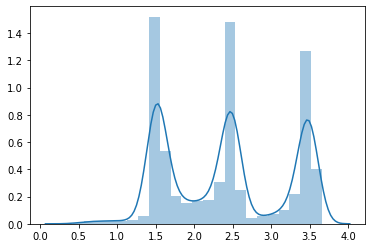

In [12]:
sns.distplot(random_vals)

# Part 3: Adding an intelligent agent to track the noise

In [25]:
def sigmoid_activation(val):
  sigmoid = 1/1+np.exp(-val)
  return sigmoid

def predict_step(noise1,weights1):
    net_sum1 = 0
    net_sum1 = weights1[0]
    net_sum1+=weights1[1]*noise1
    return 1.0 if net_sum1 >= 0.005 else 0.0

def predict(noise2,weights2):
    net_sum = 0
    net_sum = weights2[0]
    net_sum += weights2[1]*noise2
    activation2 = sigmoid_activation(net_sum)
    return activation2, net_sum

def train_weights(array, lr, loops):
    weights3 = [-0.10,rand.uniform(0,1)]
    for loop in range(loops):
        net_array = []
        sum_error = 0.0
        for a in array:
            prediction, netwrk_sum = predict(a,weights3)
            Target = a
            delta = Target - prediction
            error = delta
            net_array.append(prediction)
            weights3_change_bias= -lr*Target*error
            weights3[0] = weights3[0] + weights3_change_bias
            weights3_change= -lr*Target*error
            weights3[1] = weights3[1] + weights3_change
            sum_error += error**2
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (loop, lr, sum_error))
    return net_array

def train_weights_step(array, lr, loops):
    weights3 = [-0.10,rand.uniform(0,1)]
    for loop in range(loops):
        net_array = []
        sum_error = 0.0
        for a in array:
            prediction = predict_step(a,weights3)
            Target = a
            delta = Target - prediction
            error = delta
            net_array.append(prediction)
            weights3_change_bias= -lr*Target*error
            weights3[0] = weights3[0] + weights3_change_bias
            weights3_change= -lr*Target*error
            weights3[1] = weights3[1] + weights3_change
            #print("weight",weights3[1])
            sum_error += error**2
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (loop, lr, sum_error))
    return net_array

## Train network using sigmoid

In [26]:
values = train_weights(random_vals, 0.006531,5)

>epoch=0, lrate=0.007, error=153.265
>epoch=1, lrate=0.007, error=291.259
>epoch=2, lrate=0.007, error=291.259
>epoch=3, lrate=0.007, error=291.259
>epoch=4, lrate=0.007, error=291.259


In [27]:
len(values)

15001

## Network prediction(blue) against noise values(yellow)

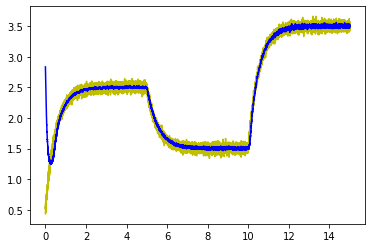

In [28]:
y_axis = values #network output
y = random_vals
x_axis = x = t_array1
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Train network using step function

In [29]:
values1 = train_weights_step(random_vals, 0.006531,3)

>epoch=0, lrate=0.007, error=95040.759
>epoch=1, lrate=0.007, error=95499.345
>epoch=2, lrate=0.007, error=95499.345


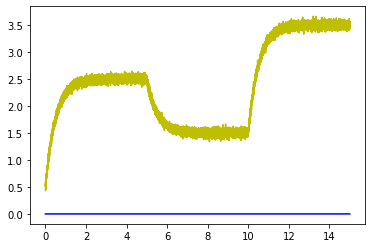

In [30]:
y_axis = values1 #network output
y = random_vals
x_axis = x = t_array1
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()